In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df =pd.read_csv(r"C:\Users\chaud\OneDrive\Desktop\Python\Time series\ARIMA MODEL\AirPassengers.csv")
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<AxesSubplot:xlabel='date'>

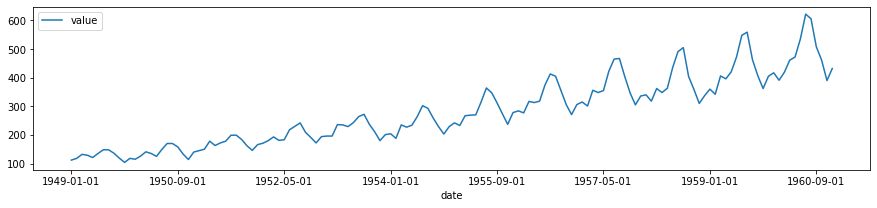

In [3]:
df.plot.line(x = 'date',y = 'value',figsize=(15,3))

###  Stationary -- ADF Test

* H0 : - The data is non-stationary

* H1 : - The data is stationary

* Alpha = 0.05

In [4]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df['value'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

* we do not Reject Ho.
* The data is non-stationary.

### Differencing

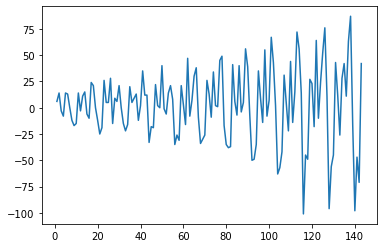

In [5]:
from matplotlib import pyplot
diff =df.value.diff()
pyplot.plot(diff)
pyplot.show()

In [6]:
df["diff_1"]=df["value"].diff()
df["diff_2"]=df["value"].diff(periods=2)
df

,date,value,diff_1,diff_2
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,6.0,NaN
2,1949-03-01,132,14.0,20.0
3,1949-04-01,129,-3.0,11.0
4,1949-05-01,121,-8.0,-11.0
...,...,...,...,...
139,1960-08-01,606,-16.0,71.0
140,1960-09-01,508,-98.0,-114.0
141,1960-10-01,461,-47.0,-145.0
142,1960-11-01,390,-71.0,-118.0


In [7]:
import numpy as np
np.var(df)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


value     14291.973331
diff_1     1131.384029
diff_2     2957.492561
dtype: float64

In [8]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64

* we  Reject Ho.
* The data is stationary.

# ACF & PACF Plot

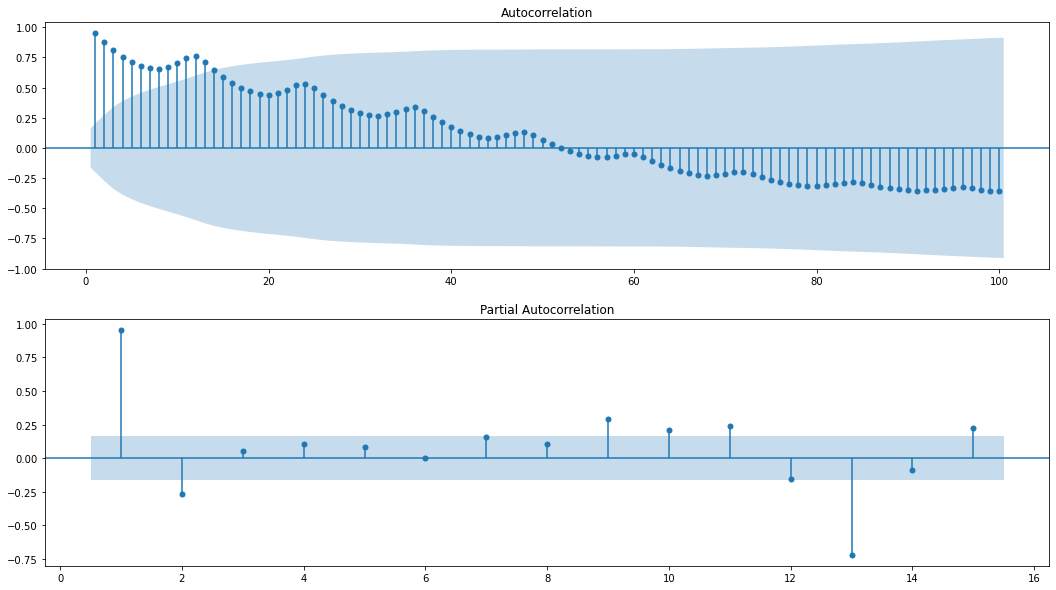

In [9]:
f,ax =plt.subplots(nrows=2, ncols=1, figsize=(18,10))
plot_acf(df["value"], lags=100, ax=ax[0], zero =False)
plot_pacf(df["value"], lags=15, ax=ax[1], zero =False)
plt.show()

### Auto Arima Model

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model =pm.auto_arima(df.value, start_p=1 ,start_q=1,
                    test="adf",         # use adftest to find optimal "d"
                    max_p=3, max_q=3 , #maximum p and q
                    m=12,              # frequency of series
                    d=None,            # let model determine "d"
                    seasonal =False,  # no seasonality
                    start_P=0,
                    D=0,
                    trace=True,
                    error_action="ignore",
                    suppress_warnings=True,
                    stepwise=True)

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1411.319, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, T

# fitted_value

In [11]:
df["forcast"] =model.predict_in_sample()

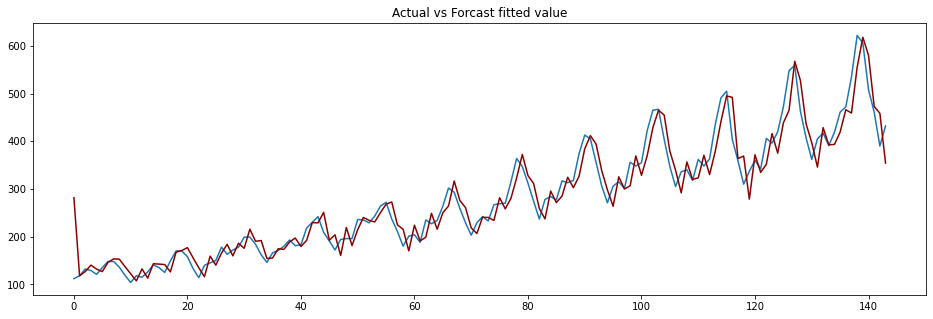

In [12]:
# plot
plt.figure(figsize=(16,5))
plt.plot(df.value)
plt.plot(df.forcast,color="darkred")
plt.title("Actual vs Forcast fitted value")
plt.show()

### Accuracy Metrics

In [13]:
def forcast_accuracy(actual,forecast):
    mape =(np.mean(np.abs(actual-forecast)/np.abs(actual)))*100
    return({"mape:-":mape})
forcast_accuracy(df.value,df.forcast)

{'mape:-': 9.555653756189544}

### Forcast

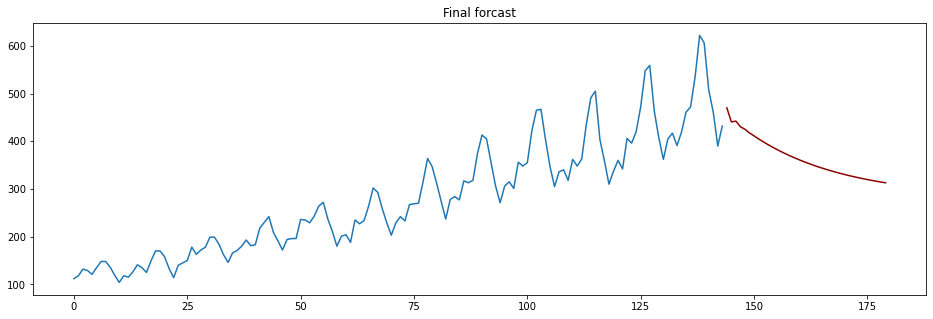

In [14]:
n_periods =36
fc =model.predict(n_periods=n_periods)
index_of_fc =np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series =pd.Series(fc, index=index_of_fc)

# plot
plt.figure(figsize=(16,5))
plt.plot(df.value)
plt.plot(fc_series,color="darkred")
plt.title("Final forcast")
plt.show()

--------------------------------------------------------------------------------------------------------------------------

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [16]:
df =pd.read_csv(r"C:\Users\chaud\OneDrive\Desktop\Python\Time series\ARIMA MODEL\AirPassengers.csv")
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<AxesSubplot:xlabel='date'>

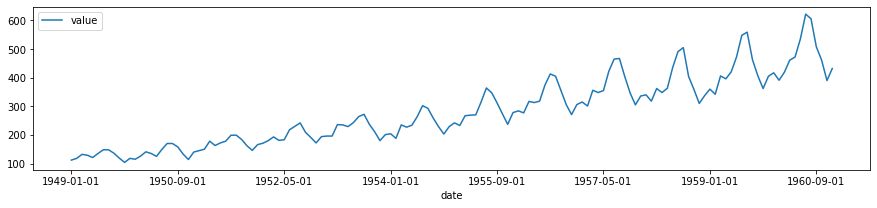

In [17]:
df.plot.line(x = 'date',y = 'value',figsize=(15,3))

Stationary -- ADF Test
H0 : - The data is non-stationary

H1 : - The data is stationary

Alpha = 0.05

In [18]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df['value'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

* we Reject Ho.
* The data is stationary.

### Differencing

In [19]:
df["diff_1"]=df["value"].diff()
df["diff_2"]=df["value"].diff(periods=2)
df

,date,value,diff_1,diff_2
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,6.0,NaN
2,1949-03-01,132,14.0,20.0
3,1949-04-01,129,-3.0,11.0
4,1949-05-01,121,-8.0,-11.0
...,...,...,...,...
139,1960-08-01,606,-16.0,71.0
140,1960-09-01,508,-98.0,-114.0
141,1960-10-01,461,-47.0,-145.0
142,1960-11-01,390,-71.0,-118.0


In [20]:
import numpy as np
np.var(df)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


value     14291.973331
diff_1     1131.384029
diff_2     2957.492561
dtype: float64

In [21]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64

* we Reject Ho.
* The data is stationary.

### ACF & PACF value

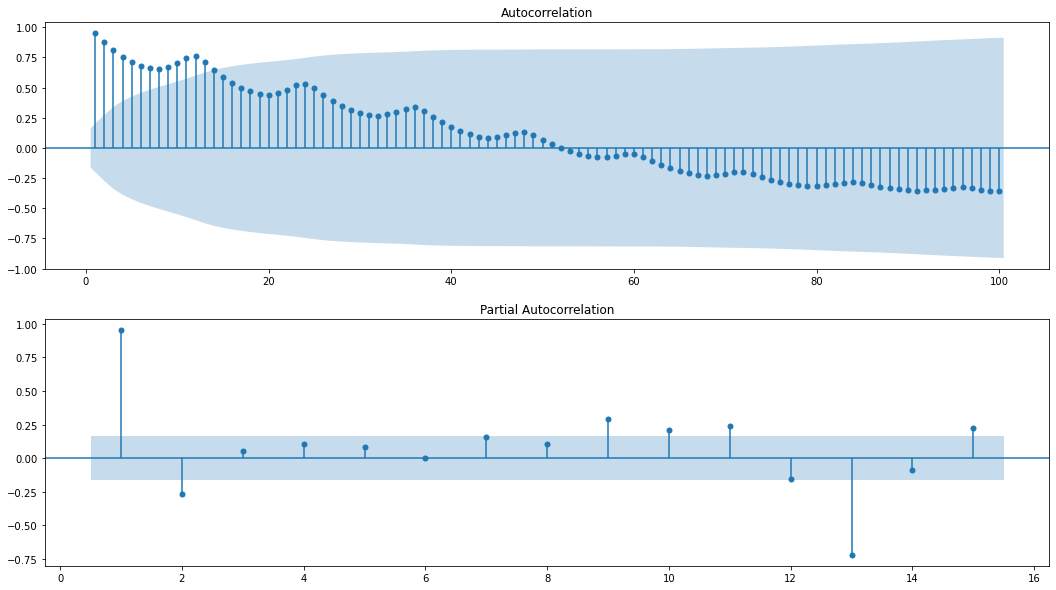

In [22]:
f,ax =plt.subplots(nrows=2, ncols=1, figsize=(18,10))
plot_acf(df["value"], lags=100, ax=ax[0], zero =False)
plot_pacf(df["value"], lags=15, ax=ax[1], zero =False)
plt.show()

In [25]:
import pmdarima as pm
# seasonal -fit stepwise auto arima
model =pm.auto_arima(df.value, start_p=1 ,start_q=1,
                    test="adf",         # use adftest to find optimal "d"
                    max_p=3, max_q=3 , #maximum p and q
                    m=12,              # frequency of series
                    d=None,            # let model determine "d"
                    seasonal =True,  #  seasonality
                    start_P=0,
                    D=1,
                    trace=True,
                    error_action="ignore",
                    suppress_warnings=True,
                    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.49 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.69 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.18 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.69 sec
 ARIMA(0,1,1)(1,1,1)[12]     

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Wed, 20 Jul 2022   AIC                           1019.178
Time:                                     11:22:27   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
df["forcast_SR"] =model.predict_in_sample()

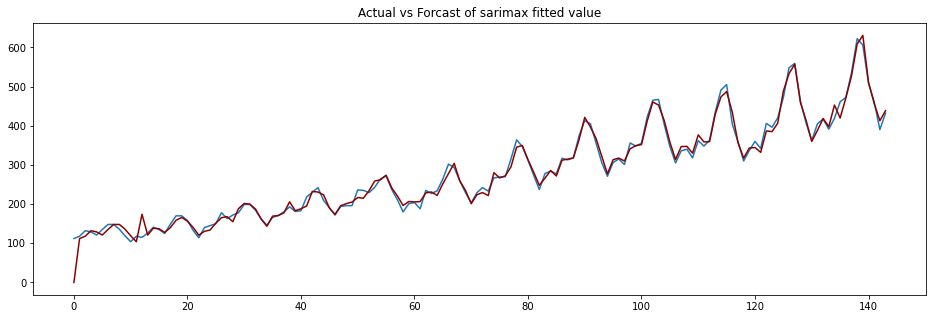

In [28]:
# plot
plt.figure(figsize=(16,5))
plt.plot(df.value)
plt.plot(df.forcast_SR,color="darkred")
plt.title("Actual vs Forcast of sarimax fitted value")
plt.show()

In [29]:
def forcast_accuracy(actual,forecast):
    mape =(np.mean(np.abs(actual-forecast)/np.abs(actual)))*100
    return({"mape:-":mape})
forcast_accuracy(df.value,df.forcast_SR)

{'mape:-': 4.5676407229999665}

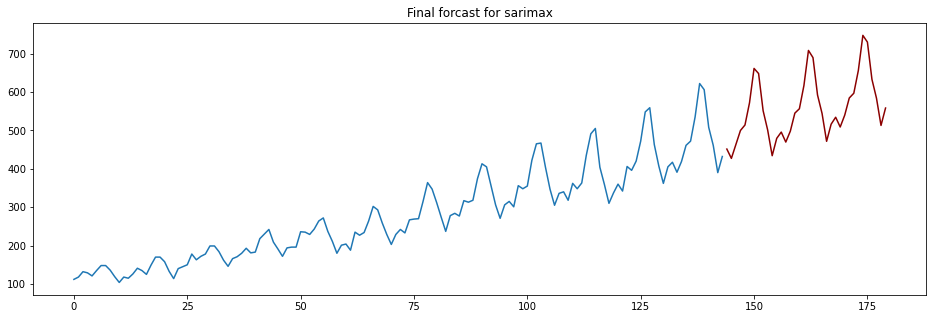

In [31]:
n_periods =36
fc =model.predict(n_periods=n_periods)
index_of_fc =np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series =pd.Series(fc, index=index_of_fc)

# plot
plt.figure(figsize=(16,5))
plt.plot(df.value)
plt.plot(fc_series,color="darkred")
plt.title("Final forcast for sarimax")
plt.show()